In [2]:
import pandas as pd
import networkx as nx
import re
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
import collections

In [3]:
terr = pd.read_excel('~/Downloads/Telegram Desktop/terr.xlsx')
# 2000 year starts from row 70000
terr = terr[70000:]

In [4]:
terr

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
70000,200001280006,2000,1,28,NaN,1,2000-01-29,45,Colombia,3,...,NaN,"""Columbia - kidnapping ELP releases 11 of 19 h...",NaN,NaN,UMD Schmid 2012,0,0,0,0,NaN
70001,200001280007,2000,1,0,"January 27-28, 2000",1,2000-01-28,45,Colombia,3,...,Sources state the incident happened on differe...,"""Eleven killed in death squad attack on Colomb...","""Colombia - Massacre paramilitary group kills ...","""Paramilitary gang kills at least 11 Colombian...",UMD Schmid 2012,0,0,0,0,NaN
70002,200001290001,2000,1,29,NaN,1,NaT,6,Algeria,10,...,NaN,"Imad Ghassen, “Algerian Press: Armed Rebels Ki...",NaN,NaN,CETIS,0,0,0,0,NaN
70003,200001290002,2000,1,29,NaN,0,NaT,213,Uganda,11,...,Nine people were returned to the camp and 20 p...,“Uganda: LRA Reportedly Abducts 20 Children Fr...,NaN,NaN,CETIS,0,0,0,0,NaN
70004,200001290003,2000,1,29,NaN,0,NaT,6,Algeria,10,...,NaN,"Salim H, “Algeria: Municipal Guard killed in B...",NaN,NaN,CETIS,-9,-9,0,-9,NaN
70005,200001290004,2000,1,29,NaN,0,NaT,185,Spain,8,...,NaN,“Spain: Acts of Violence Reported in Basque Co...,“Basque Country: Arson Attack on Bilbao Railwa...,NaN,CETIS,-9,-9,0,-9,NaN
70006,200001290005,2000,1,29,NaN,0,NaT,185,Spain,8,...,NaN,“Spain: Acts of Violence Reported in Basque Co...,NaN,NaN,CETIS,-9,-9,0,-9,NaN
70007,200001290006,2000,1,29,NaN,1,NaT,139,Namibia,11,...,NaN,“Namibia: Two Girls Abducted By Suspected Ango...,NaN,NaN,CETIS,1,1,0,1,NaN
70008,200001290007,2000,1,29,NaN,0,NaT,185,Spain,8,...,NaN,“Spain: Basque Socialist Councillor's Home Fir...,NaN,NaN,CETIS,-9,-9,0,-9,NaN
70009,200001290008,2000,1,29,NaN,0,NaT,153,Pakistan,6,...,NaN,"“Two killed, three injured in bomb blast in Pa...","Munir Ahmed, “Bomb kills two people in Pakista...","“Bomb Kills Two in Pakistani Village,” Associa...",CETIS,-9,-9,0,-9,NaN


In [32]:
# getting non-isolated vertices from 2005 y.
g1_data = terr.loc[(terr['iyear'] == 2005) & (pd.isnull(terr['related']) == False)]

# setting unique id to every terr
id_map = dict(zip(g1_data['eventid'], list(range(len(g1_data['eventid'])))))

# initializing graph_1
G_1 = nx.Graph()
G_1.add_nodes_from(range(len(g1_data['eventid'])))

for row in g1_data.iterrows():
    edges_ = re.findall('\d+', row[1]['related'])
    for e in edges_:
        G_1.add_edge(id_map[row[1]['eventid']], id_map[int(e)])
        
# now lets connect some components
components = sorted(list(nx.connected_components(G_1)), key=lambda x: len(x), reverse=True)
# now lets randomly connect first 15 biggest components
for i in range(30):
    comp_1 = random.randint(0, 15)
    comp_2 = random.randint(0, 15)
    node_1 = random.choice(list(components[comp_1]))
    node_2 = random.choice(list(components[comp_2]))
    G_1.add_edge(node_1, node_2)

In [33]:
# getting non-isolated vertices from 2001 y.
g2_data = terr.loc[(terr['iyear'] == 2001) & (pd.isnull(terr['related']) == False)]

# setting unique id to every terr
id_map = dict(zip(g2_data['eventid'], list(range(len(g2_data['eventid'])))))

# initializing graph_1
G_2 = nx.Graph()
G_2.add_nodes_from(range(len(g2_data['eventid'])))

for row in g2_data.iterrows():
    edges_ = re.findall('\d+', row[1]['related'])
    for e in edges_:
        G_2.add_edge(id_map[row[1]['eventid']], id_map[int(e)])
        
# now lets connect some components
components = sorted(list(nx.connected_components(G_2)), key=lambda x: len(x), reverse=True)
# now lets randomly connect first 15 biggest components
for i in range(30):
    comp_1 = random.randint(0, 15)
    comp_2 = random.randint(0, 15)
    node_1 = random.choice(list(components[comp_1]))
    node_2 = random.choice(list(components[comp_2]))
    G_2.add_edge(node_1, node_2)

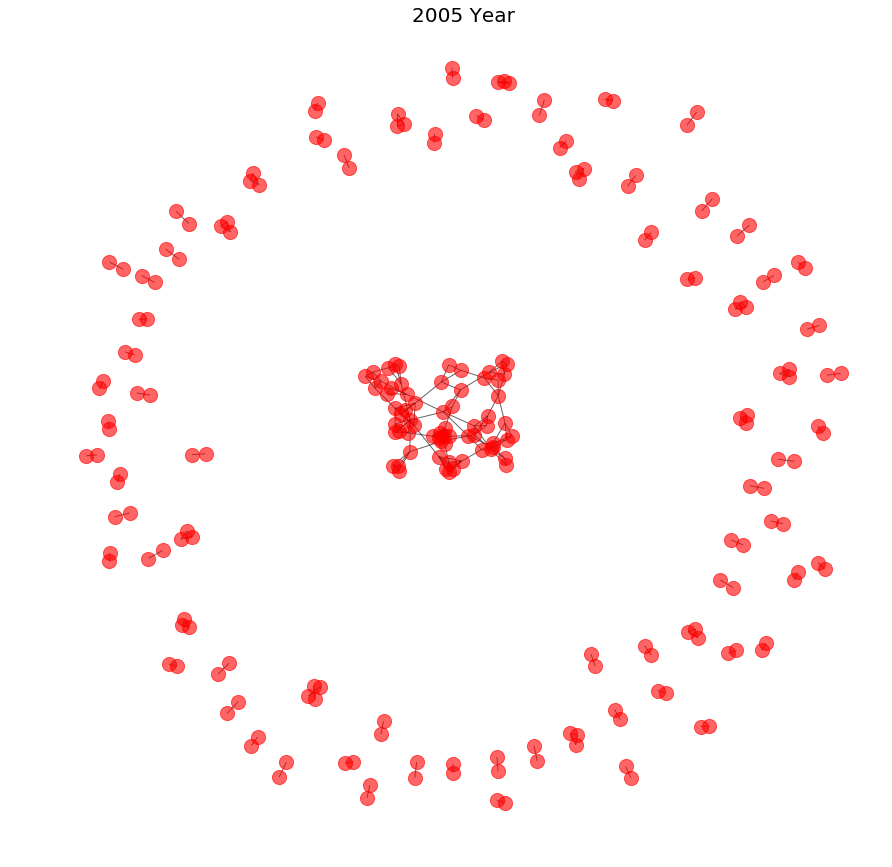

In [34]:
plt.figure(figsize=(15,15))

pos = nx.kamada_kawai_layout(G_1)
nx.draw_networkx(G_1, alpha=0.6, node_size=200, with_labels=False,)

plt.title('2005 Year', size=20)
plt.axis('off')
plt.show()

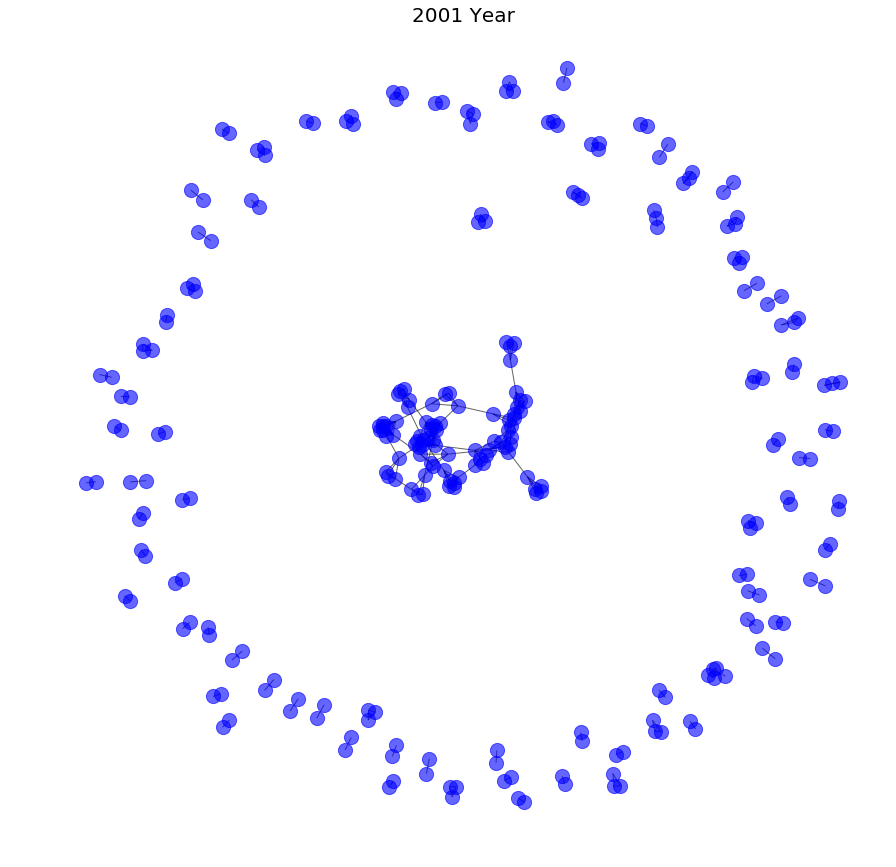

In [35]:
plt.figure(figsize=(15,15))

pos = nx.kamada_kawai_layout(G_2)
nx.draw_networkx(G_2, alpha=0.6, node_size=200, with_labels=False, node_color='blue')

plt.title('2001 Year', size=20)
plt.axis('off')
plt.show()

## Graph edit distance

In [37]:
def substitute_cost(g1, g2, n_e_1, n_e_2, calc='graph'):
    if calc is 'graph':
        return (0 if n_e_1 == n_e_2 else 1) + edge_dist(g1, g2, n_e_1, n_e_2)
    else:
        return (0 if n_e_1 == n_e_2 else 1)

def edge_dist(g1, g2, node1, node2):
    edges1 = list(g1.edges(node1))
    edges2 = list(g2.edges(node2))
    
    if len(edges1) == 0 or len(edges2) == 0:
        return max(len(edges1), len(edges2))

    tmp_graph_1 = nx.Graph()
    tmp_graph_2 = nx.Graph()
        
    tmp_graph_1.add_nodes_from(edges1)
    tmp_graph_2.add_nodes_from(edges2)
    
    res = graph_edit_dist(tmp_graph_1, tmp_graph_2, calc='edge')
    return res

def graph_edit_dist(g1, g2, calc='graph'):
    g1_nodes = list(g1.nodes)
    g2_nodes = list(g2.nodes)
    n, m = len(g1_nodes), len(g2_nodes)
    matrix = np.zeros((n + m, n + m))
    
    for i in range(n):
        for j in range(m):
            res = substitute_cost(g1, g2, g1_nodes[i], g2_nodes[j], calc)
            matrix[i, j] = res
            
    for i in range(m):
        for j in range(m):
            matrix[i+n, j] = (1 if i == j else 2**64)
            
    for i in range(n):
        for j in range(n):
            matrix[j, i+m] = (1 if i == j else 2**64)
            
    idx, idy = linear_sum_assignment(matrix)
    return sum([matrix[idx[i]][idy[i]] for i in range(len(idx))])

In [38]:
graph_edit_dist(G_1, G_2)

364.0

## Key metrics

### Diameter

In [615]:
def floyd_warshall(matrix):
    n = len(matrix)
    tmp_matrix = matrix.copy()
    tmp_matrix[np.where(tmp_matrix == 0)] = 2**31
    for i in range(n):
        tmp_matrix[i, i] = 0

    for k in range(n):
        for i in range(n):
            for j in range(n):
                tmp_matrix[i, j] = min(tmp_matrix[i, j], tmp_matrix[i, k] + tmp_matrix[k, j])
                
    return tmp_matrix, np.max(tmp_matrix[np.where(tmp_matrix != 2**31)])

# getting adjacency matrix
g1_amx = nx.adjacency_matrix(G_1).todense()
g2_amx = nx.adjacency_matrix(G_2).todense()

g1_all_p, g1_diameter = floyd_warshall(g1_amx)
g2_all_p, g2_diameter = floyd_warshall(g2_amx)

print ('Graph 1 diameter - {}'.format(g1_diameter))
print ('Graph 2 diameter - {}'.format(g2_diameter))

Graph 1 diameter - 12
Graph 2 diameter - 9


### Eccentricity

In [616]:
# in fact, from floyd warshall we have all shortest pathes
# so that we just need to get max possible path for vertex
def get_eccentricity(shortest_path_m):
    tmp_arr = shortest_path_m.copy()
    tmp_arr[np.where(shortest_path_m == 2**31)] = -1
    return np.array(np.max(tmp_arr, axis=0))[0]

In [617]:
# eccentricites for every vertex in graph2 and graph 1
print ('Graph2 - {}'.format(get_eccentricity(g2_all_p)))
print ('Graph1 - {}'.format(get_eccentricity(g1_all_p)))

Graph2 - [1 1 1 1 6 6 6 6 1 1 1 6 7 7 7 9 9 8 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6
 6 5 6 6 1 1 1 1 7 6 7 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 5 1 1 5 5 5 1 7 7 6 1 1 1 7 6 1 1 1 1 1 9 9 8 8 8 9 9 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 6 6 6 5 6 5 6 6 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 6 1 1 1 1 7 7 7 1 1 1 1 1 1 7 7 6 7 6 6 6 6 7 1 1 1 8 1 1 2 2 8 7
 8 1 1 8 8 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 7 7 7 6 1 1 7 1 1 1 1 1 1 7
 7 7 7 6 7 1 1 7 7 6 7 7]
Graph1 - [ 1  1  1  1  9 10 10  9  1  1  9  9  8  1  1  1  1  1  1  7  8  8  8  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  9  8  1  1  9  1  1  1  1 10 10
  9  1  1  1  1  1  1  1  1  1  1  1  1  1  1 10 10  9 11 12 12  1  1  9
  9  8  9  1  1  1  1  7  8  7  8  8  1  1  6  7  7  1  1  1  1  1  1  1
  1  6  7  7  7 12 11 12 12  9 10  9 10  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

### Periphery

In [618]:
def periphery_subgrpaph(diameter, shortest_path_m):
    all_eccentrities = get_eccentricity(shortest_path_m)
    diam_ec_vertices = np.where(all_eccentrities == diameter)[0]
    return diam_ec_vertices

print ('G1 Periphery set of vertices: {}'.format(periphery_subgrpaph(g1_diameter, g1_all_p)))
print ('G2 Periphery set of vertices: {}'.format(periphery_subgrpaph(g2_diameter, g2_all_p)))

G1 Periphery set of vertices: [ 67  68 101 103 104]
G2 Periphery set of vertices: [ 15  16 133 134 138 139]


### Girth

In [619]:
min_girth_len = 2**31

def get_path(parents, cur_v, fin_v, cur_path_len):
    global min_girth_len
    if cur_v == fin_v:
        if cur_path_len < min_girth_len:
            min_girth_len = cur_path_len
        return
    else:
        if parents.get(cur_v, None) is None: return
        get_path(parents, parents[cur_v], fin_v, cur_path_len + 1)
    
def dfs(graph, cur_vertex, visited, parents):
    visited.add(cur_vertex)
    for v in graph.edges(cur_vertex):
        if v[0] == v[1]: continue
        elif v[1] == parents.get(cur_vertex, None): continue
        else: v = v[1]
        if v not in visited:
            parents[v] = cur_vertex
            dfs(graph, v, visited, parents)
        else:
            get_path(parents, cur_vertex, v, 1)
    return parents

In [620]:
def get_best_girth(graph):
    global min_girth_len
    global_min_girth = 2**31
    for i in range(len(graph.nodes)):
        min_girth_len = 2**31
        dfs(graph, i, set(), dict())
        if min_girth_len < global_min_girth:
            global_min_girth = min_girth_len
    return global_min_girth

# small test
# lets create graph with 2 cycles
# of len 5 and len 10
test_g = nx.path_graph(10)
test_g.add_edges_from([(4, 0), (9,0)])
        
print ('Smallest girth - {}'.format(get_best_girth(test_g)))

Smallest girth - 5


In [621]:
print ('G_1 girth - {}'.format(get_best_girth(G_1)))
print ('G_2 girth - {}'.format(get_best_girth(G_2)))

G_1 girth - 3
G_2 girth - 3


## Wiener index

In [622]:
# The Wiener index of a graph is the sum
# of the shortest-path distances between
# each pair of reachable nodes
# We already have all distances calculated
# with Floyd-Warshall. We just need to sum
# all distances above diagonal in our
# shortest path matrix
def wiener_index(shortest_path_m):
    n = len(shortest_path_m)
    res_sum = 0
    for i in range(n):
        if i == n - 1: break
        # lets sum pathes to all nodes,
        # reacheble from current one
        row = len(np.where(shortest_path_m[i, i+1:] == 1)[0])
        res_sum += row
    return res_sum

print ('Wiener ind G_1 - {}'.format(wiener_index(g1_all_p)))
print ('Wiener ind G_2 - {}'.format(wiener_index(g2_all_p)))

Wiener ind G_1 - 247
Wiener ind G_2 - 352


## Hosoya index

## Core